In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [25]:
df = pd.read_pickle('../working/MCR2019_null_removed.pkl')
var_info = pd.read_pickle('../working/var_info_after_03.pkl')
choices = pickle.load(open('../code/choices.pkl', 'rb'))

In [26]:
var_info

,dtypes,nunique,notnull,isnull,var,vtype,remarks,status
성별,int64,2,4000,0,input,nominal,one-hot,NaN
연령,int64,57,4000,0,input,ordinal,scaling 필요,NaN
지역,int64,7,4000,0,input,nominal,one-hot,NaN
직업,int64,7,4000,0,input,nominal,one-hot,NaN
소득,int64,12,4000,0,input,ordinal,99(모름/무응답) --> 1(99만원 미만) 변경 필요 + scaling 필요,scaling 처리 필요
최종학력,int64,12,4000,0,input,nominal,"재학 --> 졸업 순으로 변경, 학생 컬럼 추가: 재학인 경우 + scaling ...",scaling 처리 필요
주거형태,int64,5,4000,0,input,nominal,one-hot,NaN
결혼여부,int64,3,4000,0,input,nominal,one-hot,NaN
자녀총수,int64,4,4000,0,input,ordinal,자녀 총수 99(무응답) --> 0 변경 필요 + scaling 필요,scaling 처리 필요
평일인터넷,float64,37,2603,1397,input,number,null 처리 + scaling 필요,scaling 처리 필요


In [4]:
# TV관련된 컬럼들의 분포 확인
df['TV_0'].replace(choices['TV_0']).value_counts()

뉴스/보도        2899
국내 드라마        511
예능/오락         262
교양/생활정보       117
영화            104
시사/토론          56
해외 드라마         26
음악/공연/오디션      15
스포츠/골프          6
다큐멘터리           2
교육              1
99              1
Name: TV_0, dtype: int64

In [7]:
for col in df.columns[df.columns.str.contains('TV')]:
    display(df[col].value_counts().rename(index=choices[col]).to_frame())

,TV_0
뉴스/보도,2899
국내 드라마,511
예능/오락,262
교양/생활정보,117
영화,104
시사/토론,56
해외 드라마,26
음악/공연/오디션,15
스포츠/골프,6
다큐멘터리,2


,TV_1
교양/생활정보,1128
국내 드라마,1012
예능/오락,651
시사/토론,537
영화,224
음악/공연/오디션,117
해외 드라마,71
스포츠/골프,53
다큐멘터리,40
어린이/만화,9


,TV_2
예능/오락,963
국내 드라마,851
시사/토론,560
영화,374
음악/공연/오디션,229
스포츠/골프,153
다큐멘터리,151
해외 드라마,69
어린이/만화,18
교육,15


,TV_3
예능/오락,942
국내 드라마,467
영화,280
음악/공연/오디션,270
스포츠/골프,261
다큐멘터리,218
해외 드라마,43
어린이/만화,25
취미/레저,21
게임,14


,TV_4
예능/오락,489
스포츠/골프,262
다큐멘터리,246
음악/공연/오디션,217
영화,179
해외 드라마,57
게임,33
교육,24
취미/레저,20
경제정보,16


,TV_5
다큐멘터리,196
스포츠/골프,191
예능/오락,186
음악/공연/오디션,144
영화,47
경제정보,32
취미/레저,28
어린이/만화,20
교육,16
게임,13


,TV_6
스포츠/골프,133
다큐멘터리,105
음악/공연/오디션,74
예능/오락,46
취미/레저,22
교육,21
경제정보,18
어린이/만화,16
게임,10
영화,3


,TV_7
음악/공연/오디션,63
스포츠/골프,59
다큐멘터리,35
경제정보,22
취미/레저,20
교육,20
어린이/만화,15
종교,3
게임,2
예능/오락,2


,TV_8
스포츠/골프,42
음악/공연/오디션,30
경제정보,17
취미/레저,17
교육,16
어린이/만화,11
종교,2
다큐멘터리,1
해외 드라마,1
게임,1


,TV_9
경제정보,21
취미/레저,19
스포츠/골프,13
교육,12
어린이/만화,8
종교,7
게임,3


,TV_10
취미/레저,14
경제정보,12
어린이/만화,7
교육,7
게임,2
종교,1


,TV_11
취미/레저,13
경제정보,4
교육,3
게임,2


,TV_12
취미/레저,4
게임,1
종교,1


,TV_13
경제정보,2


,TV_14
취미/레저,1


,TV_15


,TV_16


In [10]:
# '99'를 null로 처리
for col in df.columns[df.columns.str.contains('TV')]:
    df.loc[df[col]==99, col] = np.nan

#### 각 선호 단계에서 선택한 TV 프로그램의 value_counts 정리

In [11]:
### TV관련 컬럼들의 value_counts df만들기
df_tv = pd.DataFrame()
for col in df.columns:
    if 'TV' in col:
        df_tv = df_tv.merge(df[col].value_counts().rename(index=choices[col]), 
                                    left_index=True, right_index=True, how='outer')
df_tv.fillna(0).astype(int)

,TV_0,TV_1,TV_2,TV_3,TV_4,TV_5,TV_6,TV_7,TV_8,TV_9,TV_10,TV_11,TV_12,TV_13,TV_14,TV_15,TV_16
게임,0,4,9,14,33,13,10,2,1,3,2,2,1,0,0,0,0
경제정보,0,0,7,11,16,32,18,22,17,21,12,4,0,2,0,0,0
교양/생활정보,117,1128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
교육,1,4,15,10,24,16,21,20,16,12,7,3,0,0,0,0,0
국내 드라마,511,1012,851,467,13,1,2,0,0,0,0,0,0,0,0,0,0
기타,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0
뉴스/보도,2899,5,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
다큐멘터리,2,40,151,218,246,196,105,35,1,0,0,0,0,0,0,0,0
스포츠/골프,6,53,153,261,262,191,133,59,42,13,0,0,0,0,0,0,0
시사/토론,56,537,560,3,0,0,0,0,0,0,0,0,0,0,0,0,0


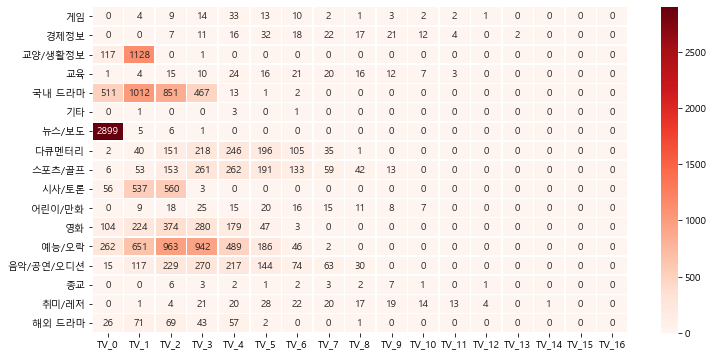

In [12]:
# heatmap
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_tv.fillna(0).astype(int), annot=True, fmt="d", linewidths=.5, cmap="Reds")

<AxesSubplot:>

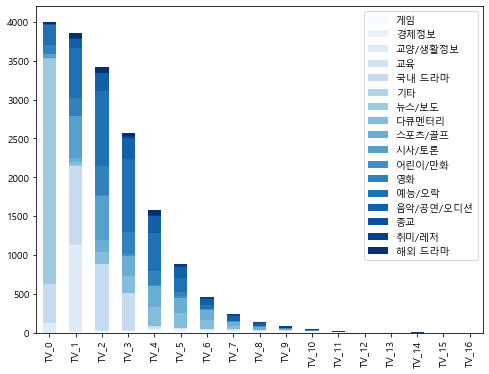

In [13]:
# stacked bar
df_tv.T.plot.bar(stacked=True, figsize=(8,6), colormap='Blues')

#### 각 선호 단계에서 선택한 드라마 장르의 value_counts 정리

In [14]:
# 드라마 관련 컬럼들의 value_counts df만들기
df_drama = pd.DataFrame()
for col in df.columns:
    if '드라마' in col:
        df_drama = df_drama.merge(df[col].value_counts().rename(index=choices[col]), 
                                          left_index=True, right_index=True, how='outer')
df_drama.fillna(0).astype(int)

,드라마_0,드라마_1,드라마_2,드라마_3,드라마_4,드라마_5,드라마_6,드라마_7,드라마_8,드라마_9,드라마_10,드라마_11,드라마_12,드라마_13,드라마_14,드라마_15
가족 드라마,418,897,321,72,0,0,0,0,0,0,0,0,0,0,0,0
공포/호러 드라마,11,30,62,31,33,27,17,9,2,2,0,0,0,0,0,0
기타,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0
로맨스/멜로 드라마,1616,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
복수극,1,9,22,24,12,9,14,14,11,5,3,2,1,0,0,0
성공신화 드라마,312,367,5,0,0,0,0,0,0,0,0,0,0,0,0,0
스포츠 드라마,17,54,85,46,43,21,6,0,0,0,0,0,0,0,0,0
액션 드라마,84,127,121,105,60,23,1,0,0,0,0,0,0,0,0,0
의학/메디컬 드라마,60,216,209,132,71,33,13,4,0,0,0,0,0,0,0,0
정치 드라마,199,245,100,8,2,1,0,0,0,0,0,0,0,0,0,0


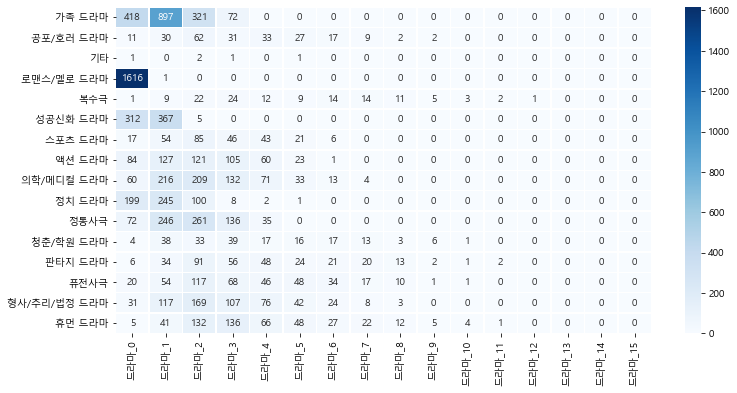

In [15]:
# heatmap
plt.figure(figsize=(12,6))
ax = sns.heatmap(df_drama.fillna(0).astype(int), annot=True, fmt="d", linewidths=.5, cmap="Blues")

<AxesSubplot:ylabel='None'>

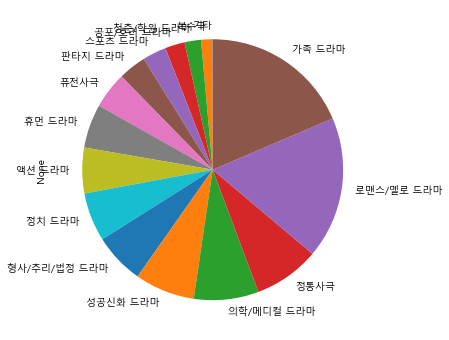

In [16]:
# pie
df_drama.sum(axis=1).sort_values().plot.pie(startangle=90, figsize=(8,6))

#### TV, 드라마의 선택된 항목을 pivoting하여 합산

In [17]:
# pivoting 
df['temp'] = 1                                        # pivoting의 value 항목으로 필요
data_TV = pd.DataFrame()
for col_name in ['TV','드라마']:
    N = df.columns.str.contains(col_name).sum()       # 선호도 조사 개수 
    # 선택지 개수
    no_of_cols = df[df.columns[df.columns.str.contains(col_name)]].fillna(0).astype(int).values.max()
    for i in range(N):
        col = f'{col_name}_{i}'                       # TV나 드라마로 시작하는 컬럼 이름 만들기
        temp = df.pivot(columns=col, values='temp')   # pivoting
        temp[[j for j in set(range(1,no_of_cols+1))-set(temp.columns)]] = 0 # Null 선택지 0으로 채움
        if i == 0:
            pivot_data = temp.fillna(0)               # 최우선 선호 항목에 대한 pivot table(가중치=1)
        else:
            pivot_data = pivot_data + temp.fillna(0) * (1-i/N)  # 선호도가 1/N만큼씩 떨어지는 것 반영
            
    pivot_data = pivot_data[range(1,no_of_cols+1)]    # 컬럼 순서 맞춰 선택
    # pivot table의 컬럼명 변경
    pivot_data.columns = [f'{col_name}_genre_{x}' for x in pivot_data.columns.astype(int)]
    # TV와 드라마의 선호도를 merge
    data_TV = data_TV.merge(pivot_data, left_index=True, right_index=True, how='outer')
display(data_TV)


,TV_genre_1,TV_genre_2,TV_genre_3,TV_genre_4,TV_genre_5,TV_genre_6,TV_genre_7,TV_genre_8,TV_genre_9,TV_genre_10,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.941176,0.0,0.882353,0.000000,...,0.0,0.000,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,0.0,0.000000,1.000000,0.941176,0.0,0.000000,0.882353,0.0,0.000000,0.000000,...,0.0,0.000,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,0.0,0.000000,0.000000,1.000000,0.0,0.941176,0.882353,0.0,0.823529,0.764706,...,0.0,0.000,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.941176,0.0,0.882353,0.823529,...,0.0,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.941176,0.0,0.882353,0.000000,...,0.0,0.000,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.0,0.941176,0.882353,0.823529,0.0,0.000000,0.764706,0.0,0.000000,0.705882,...,0.0,0.875,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
3996,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.941176,0.0,0.000000,0.000000,...,0.0,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
3997,1.0,0.000000,0.000000,0.941176,0.0,0.882353,0.823529,0.0,0.000000,0.000000,...,0.0,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
3998,1.0,0.000000,0.000000,0.941176,0.0,0.000000,0.882353,0.0,0.000000,0.000000,...,0.0,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0


In [27]:
# var_info 업데이트 
for col in df.columns[df.columns.str.contains('TV|드라마')]:
    var_info.loc[col, 'status'] = 'done'
var_info

var_info.to_pickle('../working/var_info_after_04.pkl')

In [28]:
# 중간 결과 저장
data_TV.to_pickle('../working/data_TV.pkl')

## 참고: 좀 더 고급진 ...

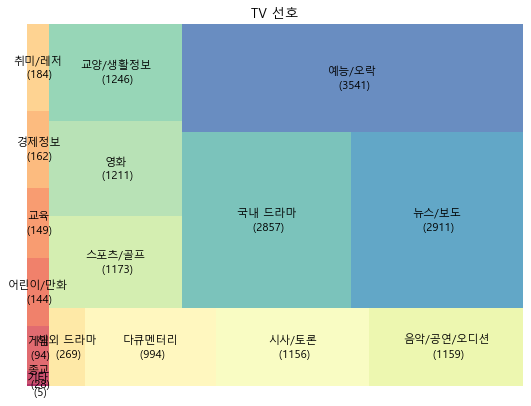

In [20]:
# mosaic plot
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import squarify 

df_tv_sum = df_tv.sum(axis=1).astype(int).sort_values().to_frame().reset_index()
df_tv_sum.columns = ['cat','cnt']

labels = df_tv_sum.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_tv_sum['cnt'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(8,6), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('TV 선호')
plt.axis('off')
plt.show()